# FMCG Sales Prediction Project

## Understanding Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("F:/DEPI Graduation Project/FMCG_2022_2024.csv")

In [3]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 20.4+ MB


In [5]:
df.shape

(190757, 14)

In [6]:
df.columns

Index(['date', 'sku', 'brand', 'segment', 'category', 'channel', 'region',
       'pack_type', 'price_unit', 'promotion_flag', 'delivery_days',
       'stock_available', 'delivered_qty', 'units_sold'],
      dtype='object')

In [7]:
df.describe()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000
mean,5.251979,0.149200,3.004860,157.697652,179.333655,19.919709
std,2.166705,0.356287,1.414626,52.736104,40.037475,11.770077
min,1.500000,0.000000,1.000000,-12.000000,-11.000000,-25.000000
25%,3.380000,0.000000,2.000000,124.000000,152.000000,12.000000
50%,5.250000,0.000000,3.000000,155.000000,179.000000,18.000000
75%,7.130000,0.000000,4.000000,192.000000,206.000000,25.000000
max,9.000000,1.000000,5.000000,405.000000,366.000000,139.000000


#### There is a negative values in stock_available and delievered_qty and units_sold need modifications


## Checking if there is any categorical data recorded in different ways 

In [8]:
df['sku'].unique()

array(['MI-006', 'MI-026', 'YO-029', 'YO-005', 'YO-012', 'YO-014',
       'YO-001', 'RE-004', 'RE-007', 'RE-015', 'MI-023', 'JU-021',
       'YO-009', 'SN-027', 'YO-003', 'MI-022', 'YO-016', 'RE-025',
       'SN-010', 'RE-017', 'SN-013', 'YO-020', 'SN-019', 'MI-002',
       'MI-011', 'YO-024', 'MI-008', 'SN-028', 'YO-018', 'SN-030'],
      dtype=object)

In [9]:
df['brand'].unique()

array(['MiBrand1', 'MiBrand4', 'YoBrand4', 'YoBrand2', 'YoBrand1',
       'YoBrand3', 'ReBrand1', 'ReBrand4', 'MiBrand3', 'JuBrand3',
       'SnBrand2', 'ReBrand2', 'SnBrand3', 'MiBrand2'], dtype=object)

In [10]:
df['segment'].unique()

array(['Milk-Seg3', 'Milk-Seg2', 'Yogurt-Seg2', 'Yogurt-Seg1',
       'Yogurt-Seg3', 'ReadyMeal-Seg2', 'ReadyMeal-Seg1', 'Juice-Seg3',
       'SnackBar-Seg3', 'ReadyMeal-Seg3', 'SnackBar-Seg2',
       'SnackBar-Seg1', 'Milk-Seg1'], dtype=object)

In [11]:
df['category'].unique()

array(['Milk', 'Yogurt', 'ReadyMeal', 'Juice', 'SnackBar'], dtype=object)

In [12]:
df['channel'].unique()

array(['Retail', 'Discount', 'E-commerce'], dtype=object)

In [13]:
df['region'].unique()

array(['PL-Central', 'PL-North', 'PL-South'], dtype=object)

In [14]:
df['pack_type'].unique()

array(['Multipack', 'Single', 'Carton'], dtype=object)

#### There is no data recorded in different ways in all categorical data

## Checking Duplicates

In [15]:
df.duplicated().sum()

np.int64(0)

#### There is no duplicate data 

## Dropping negative values

In [16]:
numeric_columns = df.select_dtypes(include=['number'])

In [17]:
negative_counts = (numeric_columns < 0).sum()
negative_counts

price_unit         0
promotion_flag     0
delivery_days      0
stock_available    3
delivered_qty      3
units_sold         3
dtype: int64

In [18]:
df = df[(numeric_columns >= 0).all(axis=1)]

In [19]:
df.describe()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190754.000000,190754.000000,190754.000000,190754.000000,190754.000000,190754.000000
mean,5.251989,0.149197,3.004839,157.700237,179.336585,19.920211
std,2.166692,0.356284,1.414626,52.732487,40.030968,11.769429
min,1.500000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,3.380000,0.000000,2.000000,124.000000,152.000000,12.000000
50%,5.250000,0.000000,3.000000,155.000000,179.000000,18.000000
75%,7.130000,0.000000,4.000000,192.000000,206.000000,25.000000
max,9.000000,1.000000,5.000000,405.000000,366.000000,139.000000


In [20]:
df.shape

(190754, 14)

#### 3 rows of negative values in numeric colums are removed

## Checking Null Values 

In [21]:
df.isnull().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

## Handling outliers 

<Axes: xlabel='delivery_days'>

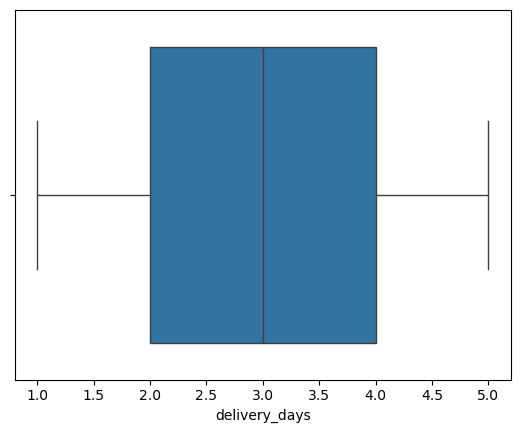

In [22]:
sns.boxplot(x = 'delivery_days' , data = df)

<Axes: xlabel='stock_available'>

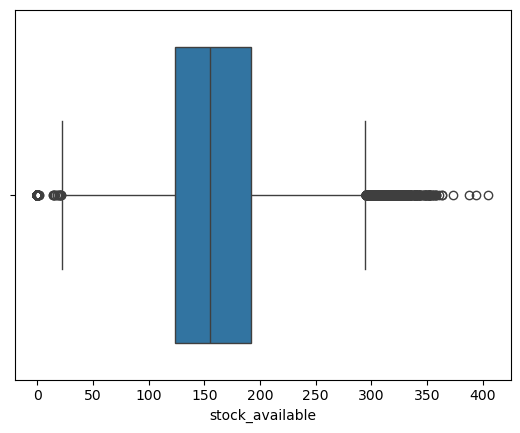

In [23]:
sns.boxplot(x = 'stock_available' , data = df)

In [24]:
Q1_stock = df['stock_available'].quantile(0.25)
Q3_stock  = df['stock_available'].quantile(0.75)
IQR_stock  = Q3_stock  - Q1_stock 
lower_bound_stock  = Q1_stock  - 1.5 * IQR_stock 
upper_bound_stock  = Q3_stock  + 1.5 * IQR_stock 
outliers_stock  = df[(df['stock_available'] < lower_bound_stock) | (df['stock_available'] > upper_bound_stock)]
num_outliers_stock = outliers_stock.shape[0]
num_outliers_stock

4911

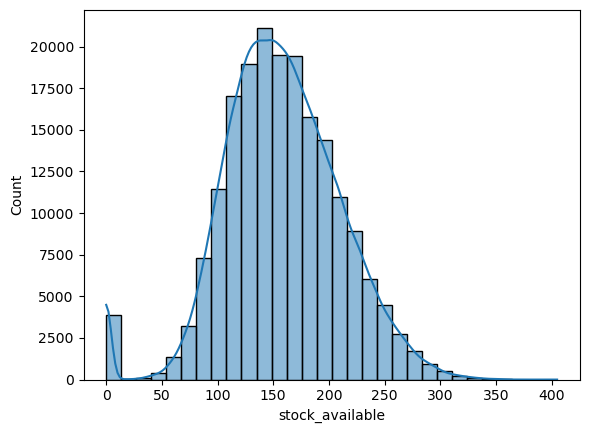

In [25]:
sns.histplot(x='stock_available', data=df, bins=30, kde=True)
plt.show()

#### We winsorizing or cappping the 1% of data to be replaced by 0.99 quantile 

In [26]:
upper_cap = df['stock_available'].quantile(0.99)
df['stock_available_capped'] = np.where(df['stock_available'] > upper_cap, upper_cap, df['stock_available'])

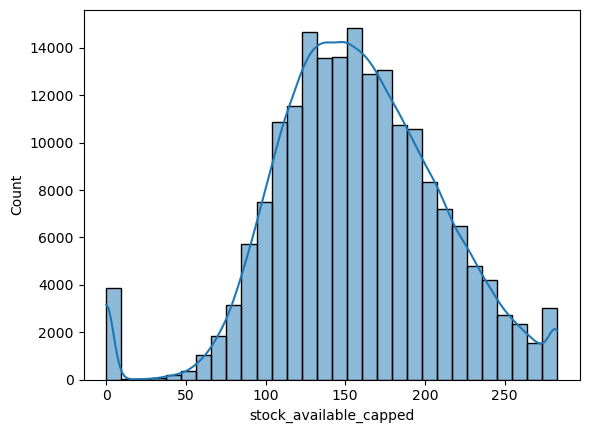

In [27]:
sns.histplot(x='stock_available_capped', data=df, bins=30, kde=True)
plt.show()

<Axes: xlabel='delivered_qty'>

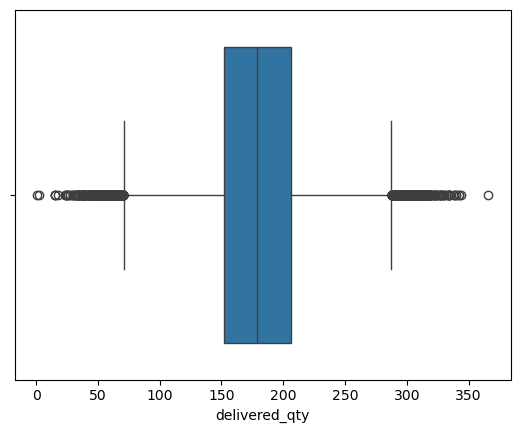

In [28]:
sns.boxplot(x = 'delivered_qty' , data = df)

In [29]:
Q1_delivery = df['delivered_qty'].quantile(0.25)
Q3_delivery  = df['delivered_qty'].quantile(0.75)
IQR_delivery  = Q3_delivery  - Q1_delivery 
lower_bound_delivery  = Q1_delivery  - 1.5 * IQR_delivery 
upper_bound_delivery  = Q3_delivery  + 1.5 * IQR_delivery 
outliers_delivery  = df[(df['delivered_qty'] < lower_bound_delivery) | (df['delivered_qty'] > upper_bound_delivery)]
num_outliers_delivery = outliers_delivery.shape[0]
num_outliers_delivery

1286

In [30]:
df['delivered_qty'].describe()

count    190754.000000
mean        179.336585
std          40.030968
min           1.000000
25%         152.000000
50%         179.000000
75%         206.000000
max         366.000000
Name: delivered_qty, dtype: float64

In [31]:
df['delivered_qty'].value_counts()

delivered_qty
175    1950
188    1916
185    1914
170    1904
182    1901
       ... 
325       1
31        1
42        1
2         1
18        1
Name: count, Length: 318, dtype: int64

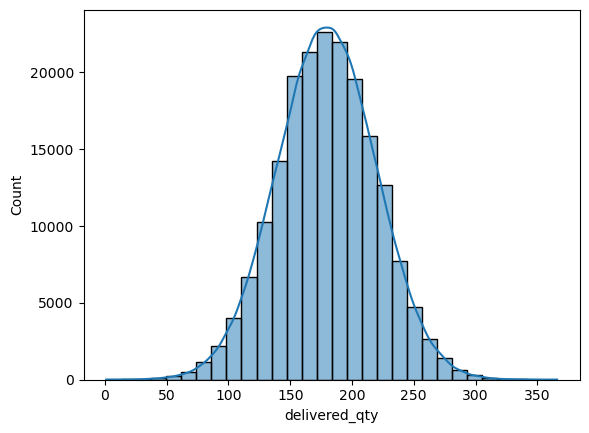

In [32]:
sns.histplot(x='delivered_qty', data=df, bins=30, kde=True)
plt.show()

In [33]:
lower_cap = df['delivered_qty'].quantile(0.01)  # 1st percentile
upper_cap = df['delivered_qty'].quantile(0.99)  # 99th percentile

df['delivered_qty_capped'] = df['delivered_qty'].clip(lower=lower_cap, upper=upper_cap)

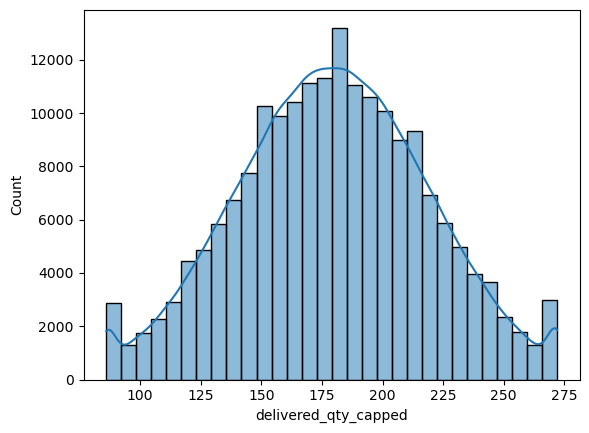

In [34]:
sns.histplot(x='delivered_qty_capped', data=df, bins=30, kde=True)
plt.show()

<Axes: xlabel='units_sold'>

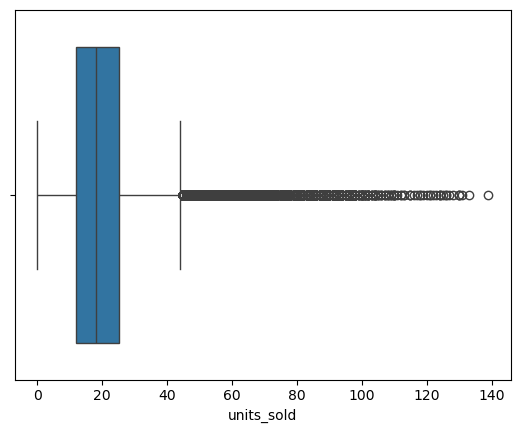

In [35]:
sns.boxplot(x = 'units_sold' , data = df)

In [36]:
Q1_sold = df['units_sold'].quantile(0.25)
Q3_sold  = df['units_sold'].quantile(0.75)
IQR_sold  = Q3_sold  - Q1_sold 
lower_bound_sold  = Q1_sold  - 1.5 * IQR_sold 
upper_bound_sold  = Q3_sold  + 1.5 * IQR_sold 
outliers_sold  = df[(df['units_sold'] < lower_bound_sold) | (df['units_sold'] > upper_bound_sold)]
num_outliers_sold = outliers_sold.shape[0]
num_outliers_sold

7707

In [37]:
df['units_sold'].describe()

count    190754.000000
mean         19.920211
std          11.769429
min           0.000000
25%          12.000000
50%          18.000000
75%          25.000000
max         139.000000
Name: units_sold, dtype: float64

## Log transformation of units sold due to skewness of data


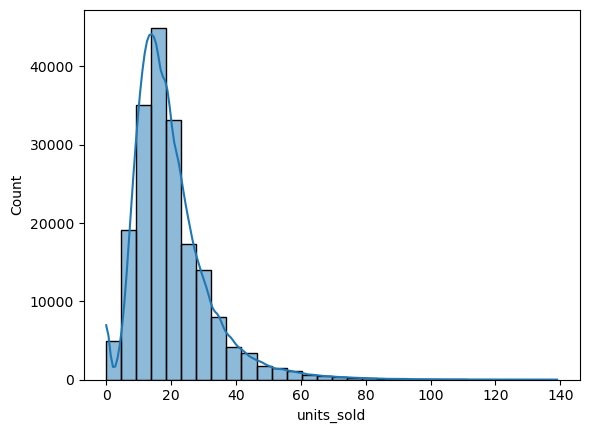

In [39]:
sns.histplot(x='units_sold', data=df, bins=30, kde=True)
plt.show()

In [38]:
df['units_sold_log'] = np.log1p(df['units_sold'])

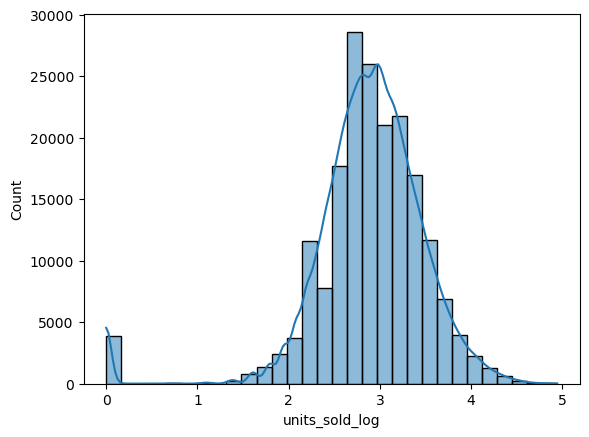

In [40]:
sns.histplot(x='units_sold_log', data=df, bins=30, kde=True)
plt.show()

In [42]:
df[['stock_available', 'delivered_qty_capped', 'units_sold_log']].corr()

,stock_available,delivered_qty_capped,units_sold_log
stock_available,1.000000,0.667557,0.699202
delivered_qty_capped,0.667557,1.000000,0.353556
units_sold_log,0.699202,0.353556,1.000000


## Feature Engineering for Modeling and EDA 

In [43]:
df['Total_price per transaction'] = df['price_unit'] * df['units_sold']

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 190754 entries, 0 to 190756
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   date                         190754 non-null  object 
 1   sku                          190754 non-null  object 
 2   brand                        190754 non-null  object 
 3   segment                      190754 non-null  object 
 4   category                     190754 non-null  object 
 5   channel                      190754 non-null  object 
 6   region                       190754 non-null  object 
 7   pack_type                    190754 non-null  object 
 8   price_unit                   190754 non-null  float64
 9   promotion_flag               190754 non-null  int64  
 10  delivery_days                190754 non-null  int64  
 11  stock_available              190754 non-null  int64  
 12  delivered_qty                190754 non-null  int64  
 13  unit

In [45]:
df['Total_price per transaction'] = df['Total_price per transaction'].astype(float)

In [46]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,141.0,128,2.302585,21.42
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.0,129,0.000000,0.00
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,118.0,161,2.197225,32.00
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,81.0,114,2.079442,36.12
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,148.0,204,2.564949,91.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25,190.0,163,3.258097,63.75
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19,141.0,131,2.995732,114.19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0,0.0,132,0.000000,0.00
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40,211.0,201,3.713572,77.20


In [47]:
def stock_status(row):
    if row['delivered_qty'] > row['units_sold']:
        return "Overstock"
    elif row['delivered_qty'] < row['units_sold']:
        return "Stockout"
    else:
        return "Urgent restock"
        

In [48]:
df['stock status'] = df.apply(stock_status, axis=1)

In [49]:
df["sell_through_rate"] = (df["units_sold"] / df["stock_available"]) * 100

In [50]:
df.sample(30)

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate
83744,2023-09-22,SN-013,SnBrand3,SnackBar-Seg2,SnackBar,E-commerce,PL-North,Carton,1.66,0,3,133,187,17,133.0,187,2.890372,28.22,Overstock,12.781955
77892,2023-08-27,MI-026,MiBrand4,Milk-Seg2,Milk,Retail,PL-Central,Single,5.85,1,1,89,148,12,89.0,148,2.564949,70.20,Overstock,13.483146
100094,2023-12-02,SN-019,SnBrand2,SnackBar-Seg1,SnackBar,Retail,PL-South,Single,7.82,0,5,199,251,15,199.0,251,2.772589,117.30,Overstock,7.537688
167236,2024-09-20,YO-020,YoBrand3,Yogurt-Seg2,Yogurt,E-commerce,PL-South,Multipack,4.36,0,2,126,140,10,126.0,140,2.397895,43.60,Overstock,7.936508
72173,2023-08-03,YO-003,YoBrand1,Yogurt-Seg3,Yogurt,Retail,PL-North,Carton,8.33,0,4,171,167,21,171.0,167,3.091042,174.93,Overstock,12.280702
127282,2024-03-30,YO-003,YoBrand1,Yogurt-Seg3,Yogurt,E-commerce,PL-Central,Single,8.81,0,5,187,171,22,187.0,171,3.135494,193.82,Overstock,11.764706
13824,2022-09-03,RE-007,ReBrand4,ReadyMeal-Seg1,ReadyMeal,Discount,PL-Central,Multipack,1.82,0,3,142,120,24,142.0,120,3.218876,43.68,Overstock,16.901408
12520,2022-08-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,7.22,0,4,102,138,8,102.0,138,2.197225,57.76,Overstock,7.843137
27067,2022-12-17,MI-026,MiBrand4,Milk-Seg2,Milk,E-commerce,PL-Central,Single,7.52,1,2,135,190,23,135.0,190,3.178054,172.96,Overstock,17.037037
179814,2024-11-14,SN-010,SnBrand2,SnackBar-Seg2,SnackBar,Discount,PL-North,Multipack,6.90,0,3,186,159,23,186.0,159,3.178054,158.70,Overstock,12.365591


In [51]:
df['date'] = pd.to_datetime(df['date'])

In [52]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,141.0,128,2.302585,21.42,Overstock,6.382979
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.0,129,0.000000,0.00,Overstock,NaN
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,118.0,161,2.197225,32.00,Overstock,6.779661
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,81.0,114,2.079442,36.12,Overstock,8.641975
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,148.0,204,2.564949,91.92,Overstock,8.108108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25,190.0,163,3.258097,63.75,Overstock,13.157895
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19,141.0,131,2.995732,114.19,Overstock,13.475177
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0,0.0,132,0.000000,0.00,Overstock,NaN
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40,211.0,201,3.713572,77.20,Overstock,18.957346


In [53]:
df['year'] = df['date'].dt.year

In [54]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,stock_available,delivered_qty,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate,year
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,...,141,128,9,141.0,128,2.302585,21.42,Overstock,6.382979,2022
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,...,0,129,0,0.0,129,0.000000,0.00,Overstock,NaN,2022
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,...,118,161,8,118.0,161,2.197225,32.00,Overstock,6.779661,2022
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,...,81,114,7,81.0,114,2.079442,36.12,Overstock,8.641975,2022
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,...,148,204,12,148.0,204,2.564949,91.92,Overstock,8.108108,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,...,190,163,25,190.0,163,3.258097,63.75,Overstock,13.157895,2024
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,...,141,131,19,141.0,131,2.995732,114.19,Overstock,13.475177,2024
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,...,0,132,0,0.0,132,0.000000,0.00,Overstock,NaN,2024
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,...,211,201,40,211.0,201,3.713572,77.20,Overstock,18.957346,2024


In [55]:
df['month'] = df['date'].dt.month

In [56]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,delivered_qty,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate,year,month
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,...,128,9,141.0,128,2.302585,21.42,Overstock,6.382979,2022,1
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,...,129,0,0.0,129,0.000000,0.00,Overstock,NaN,2022,1
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,...,161,8,118.0,161,2.197225,32.00,Overstock,6.779661,2022,1
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,...,114,7,81.0,114,2.079442,36.12,Overstock,8.641975,2022,1
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,...,204,12,148.0,204,2.564949,91.92,Overstock,8.108108,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,...,163,25,190.0,163,3.258097,63.75,Overstock,13.157895,2024,12
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,...,131,19,141.0,131,2.995732,114.19,Overstock,13.475177,2024,12
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,...,132,0,0.0,132,0.000000,0.00,Overstock,NaN,2024,12
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,...,201,40,211.0,201,3.713572,77.20,Overstock,18.957346,2024,12


In [57]:
df['day'] = df['date'].dt.day

In [58]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate,year,month,day
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,...,9,141.0,128,2.302585,21.42,Overstock,6.382979,2022,1,21
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,...,0,0.0,129,0.000000,0.00,Overstock,NaN,2022,1,21
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,...,8,118.0,161,2.197225,32.00,Overstock,6.779661,2022,1,21
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,...,7,81.0,114,2.079442,36.12,Overstock,8.641975,2022,1,21
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,...,12,148.0,204,2.564949,91.92,Overstock,8.108108,2022,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,...,25,190.0,163,3.258097,63.75,Overstock,13.157895,2024,12,31
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,...,19,141.0,131,2.995732,114.19,Overstock,13.475177,2024,12,31
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,...,0,0.0,132,0.000000,0.00,Overstock,NaN,2024,12,31
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,...,40,211.0,201,3.713572,77.20,Overstock,18.957346,2024,12,31


In [59]:
df['is_discounted'] = ((df['promotion_flag'] == 1) | (df['channel'] == 'Discount' ))


In [60]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate,year,month,day,is_discounted
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,...,141.0,128,2.302585,21.42,Overstock,6.382979,2022,1,21,False
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,...,0.0,129,0.000000,0.00,Overstock,NaN,2022,1,21,True
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,...,118.0,161,2.197225,32.00,Overstock,6.779661,2022,1,21,False
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,...,81.0,114,2.079442,36.12,Overstock,8.641975,2022,1,21,True
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,...,148.0,204,2.564949,91.92,Overstock,8.108108,2022,1,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,...,190.0,163,3.258097,63.75,Overstock,13.157895,2024,12,31,True
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,...,141.0,131,2.995732,114.19,Overstock,13.475177,2024,12,31,True
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,...,0.0,132,0.000000,0.00,Overstock,NaN,2024,12,31,False
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,...,211.0,201,3.713572,77.20,Overstock,18.957346,2024,12,31,True


In [61]:
df = df.sort_values(["sku", "date"])

In [62]:
df['units_sold_lag_1'] = df['units_sold'].shift(1)
df['units_sold_lag_7'] = df['units_sold'].shift(7)
df['units_sold_lag_30'] = df['units_sold'].shift(30)

In [63]:
df['units_sold_log_lag_1'] = df['units_sold_log'].shift(1)
df['units_sold_log_lag_7'] = df['units_sold_log'].shift(7)
df['units_sold_log_lag_30'] = df['units_sold_log'].shift(30)

In [64]:
df = df.dropna().reset_index(drop=True)

In [65]:
df["units_sold_roll7"] = df.groupby("sku")["units_sold"].transform(lambda x: x.rolling(7, min_periods=1).mean())
df["units_sold_roll30"] = df.groupby("sku")["units_sold"].transform(lambda x: x.rolling(30, min_periods=1).mean())

In [66]:
df["units_sold_log_roll7"]  = df.groupby("sku")["units_sold_log"].transform(lambda x: x.rolling(7, min_periods=1).mean())
df["units_sold_log_roll30"] = df.groupby("sku")["units_sold_log"].transform(lambda x: x.rolling(30, min_periods=1).mean())

In [67]:
df["promo_lag1"] = df["promotion_flag"] * df["units_sold_lag_1"]
df["promo_lag7"] = df["promotion_flag"] * df["units_sold_lag_7"]
df["promo_price_interaction"] = df["promotion_flag"] * df["price_unit"]
df["promo_roll7"] = df["promotion_flag"] * df["units_sold_roll7"]
df["promo_roll30"] = df["promotion_flag"] * df["units_sold_roll30"]

In [68]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,units_sold_log_lag_30,units_sold_roll7,units_sold_roll30,units_sold_log_roll7,units_sold_log_roll30,promo_lag1,promo_lag7,promo_price_interaction,promo_roll7,promo_roll30
0,2022-07-14,JU-021,JuBrand3,Juice-Seg3,Juice,E-commerce,PL-South,Carton,1.96,0,...,3.332205,29.000000,29.000000,3.401197,3.401197,0.0,0.0,0.00,0.000000,0.000000
1,2022-07-15,JU-021,JuBrand3,Juice-Seg3,Juice,Retail,PL-Central,Multipack,4.14,0,...,4.110874,23.000000,23.000000,3.145785,3.145785,0.0,0.0,0.00,0.000000,0.000000
2,2022-07-15,JU-021,JuBrand3,Juice-Seg3,Juice,Retail,PL-North,Multipack,7.76,0,...,3.218876,24.333333,24.333333,3.207925,3.207925,0.0,0.0,0.00,0.000000,0.000000
3,2022-07-15,JU-021,JuBrand3,Juice-Seg3,Juice,Retail,PL-South,Carton,4.85,0,...,3.988984,25.500000,25.500000,3.256243,3.256243,0.0,0.0,0.00,0.000000,0.000000
4,2022-07-15,JU-021,JuBrand3,Juice-Seg3,Juice,Discount,PL-Central,Multipack,7.16,0,...,3.465736,23.800000,23.800000,3.183069,3.183069,0.0,0.0,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186860,2024-12-31,YO-029,YoBrand4,Yogurt-Seg2,Yogurt,Retail,PL-Central,Single,4.47,0,...,3.433987,17.428571,16.500000,2.872779,2.755400,0.0,0.0,0.00,0.000000,0.000000
186861,2024-12-31,YO-029,YoBrand4,Yogurt-Seg2,Yogurt,Retail,PL-North,Carton,1.69,0,...,3.295837,18.000000,16.100000,2.917087,2.735808,0.0,0.0,0.00,0.000000,0.000000
186862,2024-12-31,YO-029,YoBrand4,Yogurt-Seg2,Yogurt,Discount,PL-North,Multipack,7.54,1,...,2.564949,20.000000,16.333333,2.999282,2.744036,0.0,14.0,7.54,20.000000,16.333333
186863,2024-12-31,YO-029,YoBrand4,Yogurt-Seg2,Yogurt,E-commerce,PL-Central,Multipack,5.07,1,...,2.564949,23.142857,17.133333,3.128263,2.778902,31.0,17.0,5.07,23.142857,17.133333


## Exploratory Data Analysis (EDA)

### 1. Plotting total units sold over time

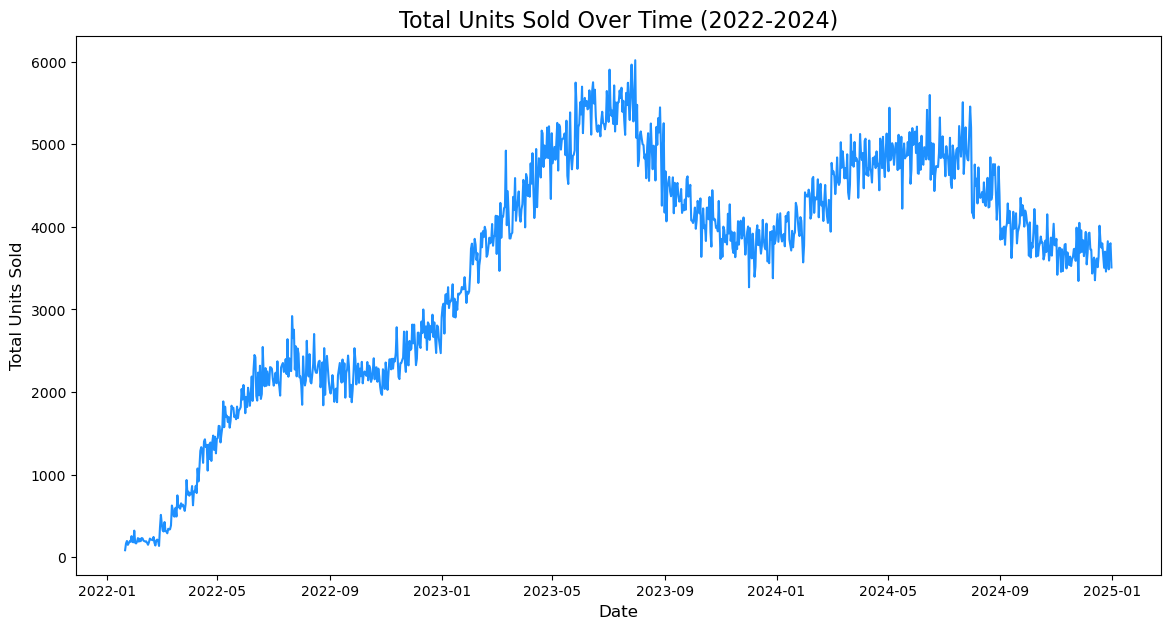

In [69]:

plt.figure(figsize=(14, 7))
sales_over_time = df.groupby('date')['units_sold'].sum()

plt.plot(sales_over_time.index, sales_over_time.values, color='dodgerblue')
plt.title('Total Units Sold Over Time (2022-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.show()

### 2. Total Units Sold by Category

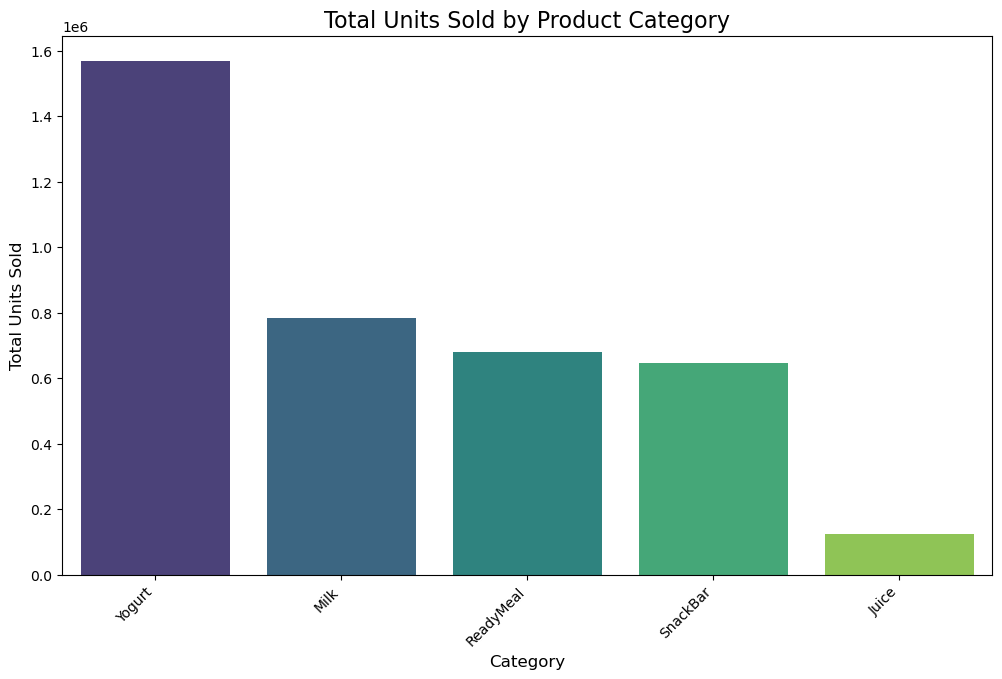

In [70]:
plt.figure(figsize=(12, 7))
category_sales = df.groupby('category')['units_sold'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, hue=category_sales.index, palette='viridis', legend=False)
plt.title('Total Units Sold by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()



### 3. Total Revenue by category "Let's see which category is performing the best in terms of sales"

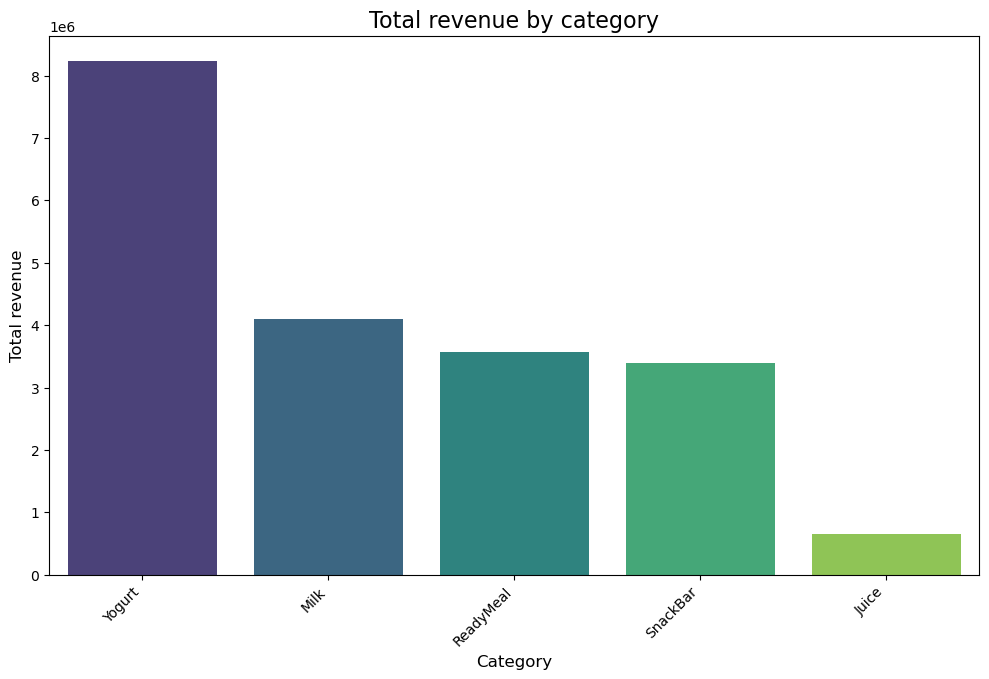

In [71]:
plt.figure(figsize=(12, 7))
category_Total_sales = df.groupby('category')['Total_price per transaction'].sum().sort_values(ascending=False)
sns.barplot(x=category_Total_sales.index, y=category_Total_sales.values, hue=category_Total_sales.index, palette='viridis', legend=False)
plt.title('Total revenue by category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### 4. Total Units Sold by Region "Let's see which regions are performing the best in terms of sales."

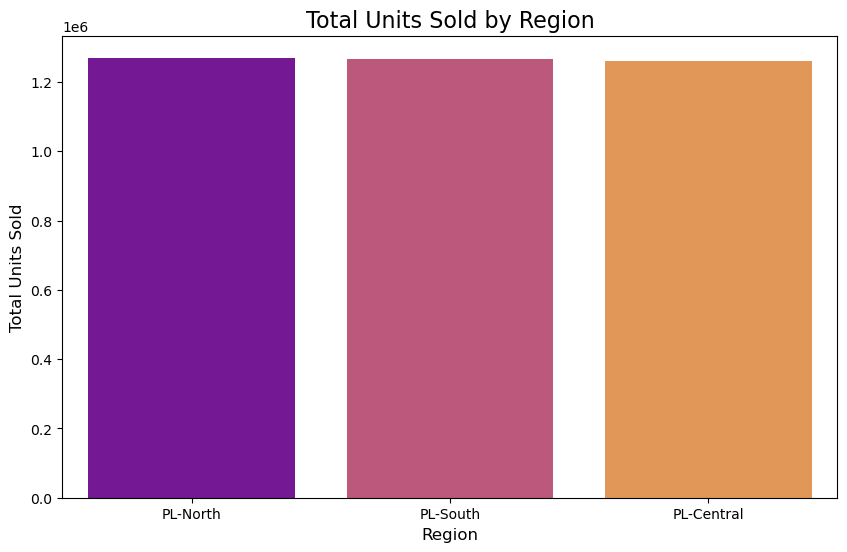

In [72]:

plt.figure(figsize=(10, 6))
region_sales = df.groupby('region')['units_sold'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette='plasma', legend=False)
plt.title('Total Units Sold by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.show()

### 5. No. of discounted transactions by category 

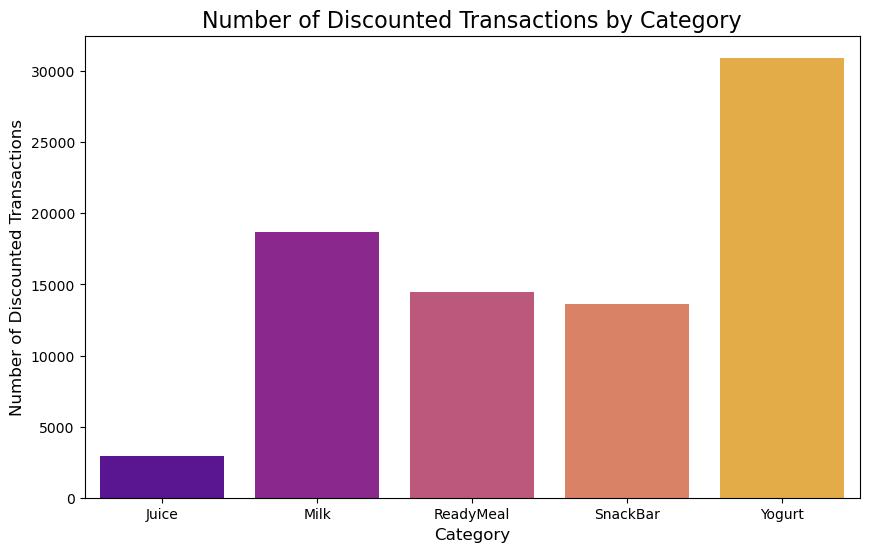

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['is_discounted'] == True], x='category', hue='category', palette='plasma',legend=False)
plt.title('Number of Discounted Transactions by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Discounted Transactions', fontsize=12)
plt.show()

## Spliting Data, one-hot encoding for categorical data and standard Scaling

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Choose split date (80% of time)
split_date = df['date'].quantile(0.8)

# Time-based split
train = df[df['date'] <= split_date].copy()
test = df[df['date'] >  split_date].copy()

print("Train range:", train['date'].min(), "-", train['date'].max())
print("Test range:",  test['date'].min(),  "-", test['date'].max())

Train range: 2022-01-21 00:00:00 → 2024-07-18 00:00:00
Test range: 2024-07-19 00:00:00 → 2024-12-31 00:00:00


In [77]:
X_train = train.drop(columns=['units_sold_log'])
y_train = train['units_sold_log']

X_test  = test.drop(columns=['units_sold_log'])
y_test  = test['units_sold_log']

In [78]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns


In [79]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)


In [80]:
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [81]:
scaler = StandardScaler()
X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
X_test_encoded[numeric_cols]  = scaler.transform(X_test_encoded[numeric_cols])

In [82]:
X_train_encoded = X_train_encoded.fillna(0)
X_test_encoded = X_test_encoded.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

In [83]:
X_train_encoded = X_train_encoded.drop(columns=['date','units_sold','Total_price per transaction','sell_through_rate'], errors='ignore')
X_test_encoded  = X_test_encoded.drop(columns=['date','units_sold','Total_price per transaction','sell_through_rate'], errors='ignore')

## Linear Regression Model

In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [85]:
y_pred_train = model.predict(X_train_encoded)
y_pred_test = model.predict(X_test_encoded)

In [86]:
y_pred_train_real = np.exp(y_pred_train)
y_train_real = np.exp(y_train)

In [87]:
y_test_real = np.exp(y_test)
y_pred_test_real = np.exp(y_pred_test)

In [88]:
# Train evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_train = mean_absolute_error(y_train_real, y_pred_train_real)
rmse_train = np.sqrt(mean_squared_error(y_train_real, y_pred_train_real))
r2_train = r2_score(y_train_real, y_pred_train_real)

print("TRAIN MAE:", mae_train)
print("TRAIN RMSE:", rmse_train)
print("TRAIN R2:", r2_train)

TRAIN MAE: 3.8576036601727344
TRAIN RMSE: 5.5357393530659955
TRAIN R2: 0.7829056008015414


In [89]:
# Test evaluation
mae_test = mean_absolute_error(y_test_real, y_pred_test_real)
rmse_test = np.sqrt(mean_squared_error(y_test_real, y_pred_test_real))
r2_test = r2_score(y_test_real, y_pred_test_real)

print("TEST MAE:", mae_test)
print("TEST RMSE:", rmse_test)
print("TEST R2:", r2_test)

TEST MAE: 3.250537067956237
TEST RMSE: 4.612236760597337
TEST R2: 0.7705433065160783


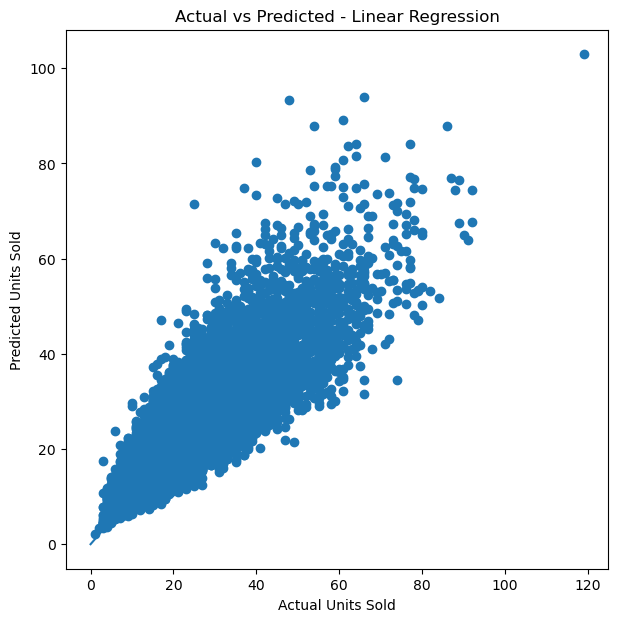

In [90]:
plt.figure(figsize=(7,7))
plt.scatter(y_test_real, y_pred_test_real)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted - Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

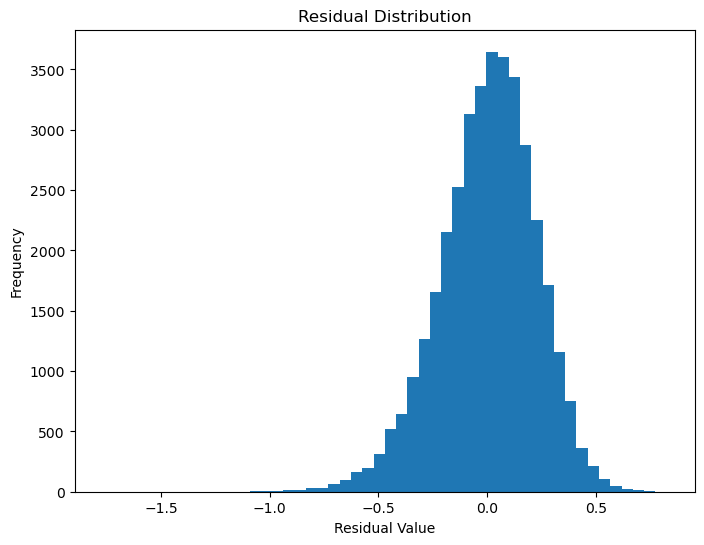

In [95]:
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=50)
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("Residual Distribution")

plt.show()

## Decision Tree Model

In [97]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,  
    min_samples_split=5,
    min_samples_leaf=1
)

In [98]:
dt_model.fit(X_train_encoded, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [99]:
dt_train_pred = dt_model.predict(X_train_encoded)
dt_test_pred  = dt_model.predict(X_test_encoded)


In [100]:
dt_train_pred_real = np.exp(dt_train_pred)
y_train_real = np.exp(y_train)

In [101]:
y_test_real = np.exp(y_test)
dt_test_pred_real = np.exp(dt_test_pred)

In [102]:
dt_train_mae  = mean_absolute_error(y_train, dt_train_pred)
dt_train_rmse = np.sqrt(mean_squared_error(y_train_real, dt_train_pred_real))
dt_train_r2   = r2_score(y_train_real, dt_train_pred_real)

print("\nDecision Tree (TRAIN) RESULTS:")
print("MAE: ",  dt_train_mae)
print("RMSE:",  dt_train_rmse)
print("R2:  ",  dt_train_r2)


Decision Tree (TRAIN) RESULTS:
MAE:  0.1692912170191501
RMSE: 4.968992886489681
R2:   0.8250821613377951


In [103]:
dt_test_mae  = mean_absolute_error(y_test_real, dt_test_pred_real)
dt_test_rmse = np.sqrt(mean_squared_error(y_test_real, dt_test_pred_real))
dt_test_r2   = r2_score(y_test_real, dt_test_pred_real)

print("\nDecision Tree (TEST) RESULTS:")
print("MAE: ",  dt_test_mae)
print("RMSE:",  dt_test_rmse)
print("R2:  ",  dt_test_r2)


Decision Tree (TEST) RESULTS:
MAE:  3.216818575843182
RMSE: 4.479454483977869
R2:   0.7835648460674557


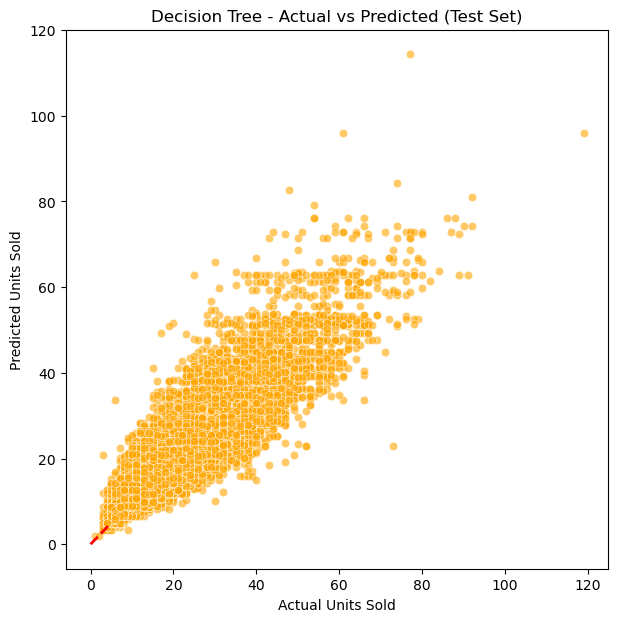

In [104]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test_real, y=dt_test_pred_real, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Decision Tree - Actual vs Predicted (Test Set)")
plt.show()

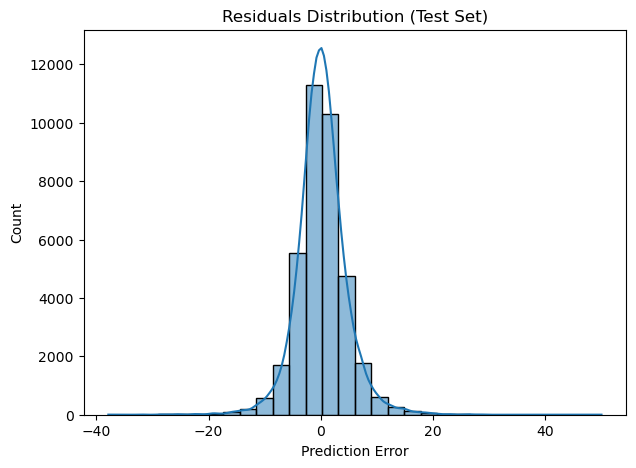

In [105]:
dt_residuals = y_test_real - dt_test_pred_real

plt.figure(figsize=(7, 5))
sns.histplot(dt_residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Test Set)")
plt.xlabel("Prediction Error")
plt.show()

## Random Forest Model

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=300, 
    max_depth=13,
    min_samples_split=3,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

In [107]:
# Fit the model
rf_model.fit(X_train_encoded, y_train)

RandomForestRegressor(max_depth=13, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [108]:
rf_train_pred = rf_model.predict(X_train_encoded)
rf_test_pred  = rf_model.predict(X_test_encoded)


In [109]:
rf_train_pred_real = np.exp(rf_train_pred)
y_train_real = np.exp(y_train)

In [110]:
y_test_real = np.exp(y_test)
rf_test_pred_real = np.exp(rf_test_pred)

In [111]:
rf_train_mae  = mean_absolute_error(y_train_real, rf_train_pred_real)
rf_train_rmse = np.sqrt(mean_squared_error(y_train_real, rf_train_pred_real))
rf_train_r2   = r2_score(y_train_real, rf_train_pred_real)

print("\nRandom Forest (TRAIN) RESULTS:")
print("MAE: ",  rf_train_mae)
print("RMSE:",  rf_train_rmse)
print("R2:  ",  rf_train_r2)


Random Forest (TRAIN) RESULTS:
MAE:  3.057412429113546
RMSE: 4.131827606114722
R2:   0.879056721169208


In [112]:
# ---- TEST SET ----
rf_test_mae  = mean_absolute_error(y_test_real, rf_test_pred_real)
rf_test_rmse = np.sqrt(mean_squared_error(y_test_real, rf_test_pred_real))
rf_test_r2   = r2_score(y_test_real, rf_test_pred_real)

print("\nRandom Forest (TEST) RESULTS:")
print("MAE: ",  rf_test_mae)
print("RMSE:",  rf_test_rmse)
print("R2:  ",  rf_test_r2)


Random Forest (TEST) RESULTS:
MAE:  3.030483612577011
RMSE: 4.161265041914596
R2:   0.8132208901567248


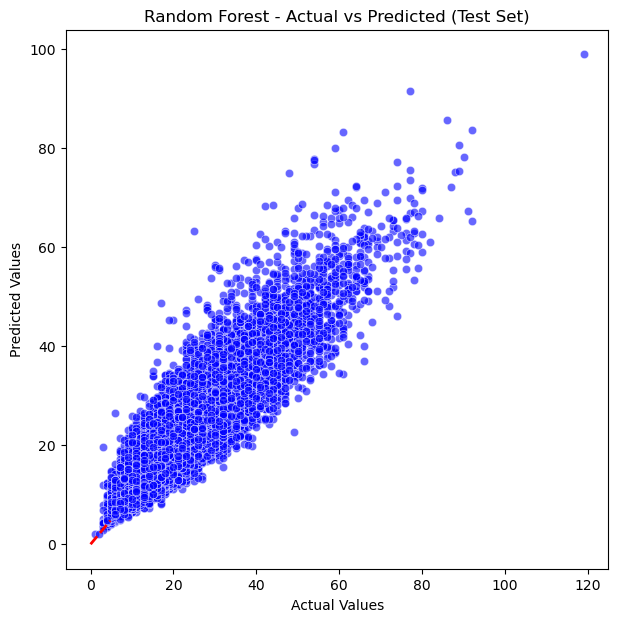

In [113]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test_real, y=rf_test_pred_real, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest - Actual vs Predicted (Test Set)")
plt.show()

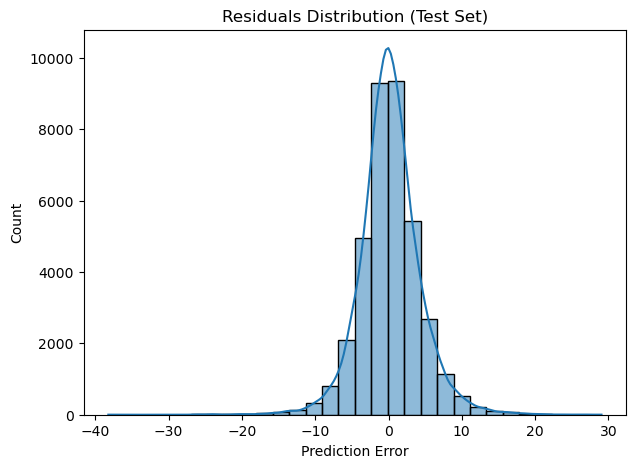

In [114]:
rf_residuals = y_test_real - rf_test_pred_real

plt.figure(figsize=(7, 5))
sns.histplot(rf_residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Test Set)")
plt.xlabel("Prediction Error")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13660\3174731387.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")


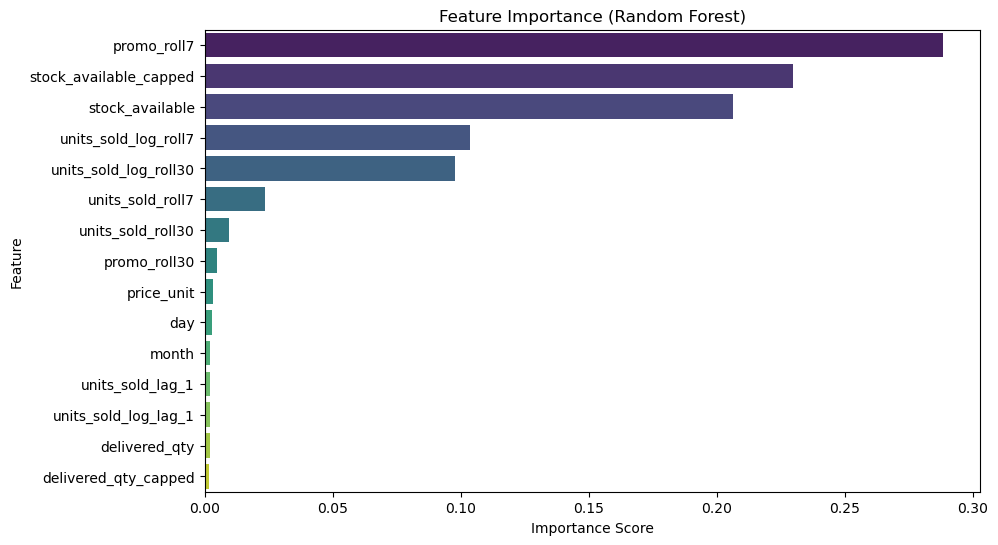

In [115]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train_encoded.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

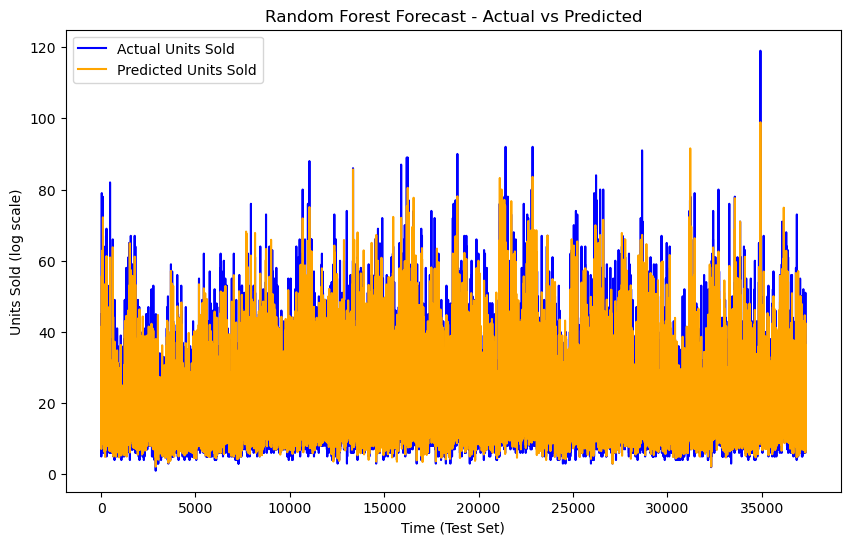

In [116]:
plt.figure(figsize=(10,6))
plt.plot(y_test_real.values, label='Actual Units Sold', color='blue')
plt.plot(rf_test_pred_real, label='Predicted Units Sold', color='orange')
plt.title("Random Forest Forecast - Actual vs Predicted")
plt.xlabel("Time (Test Set)")
plt.ylabel("Units Sold (log scale)")
plt.legend()
plt.show()

### Detecting Monthly predicted units sold  compared to actual 

In [117]:
forecast_df = pd.DataFrame({
    'date': test['date'].values,
    'Actual': y_test_real.values,
    'Predicted': rf_test_pred_real
}).sort_values('date')

In [118]:
forecast_df['date'] = pd.to_datetime(forecast_df['date'])
forecast_monthly = forecast_df.resample('ME', on='date').mean()

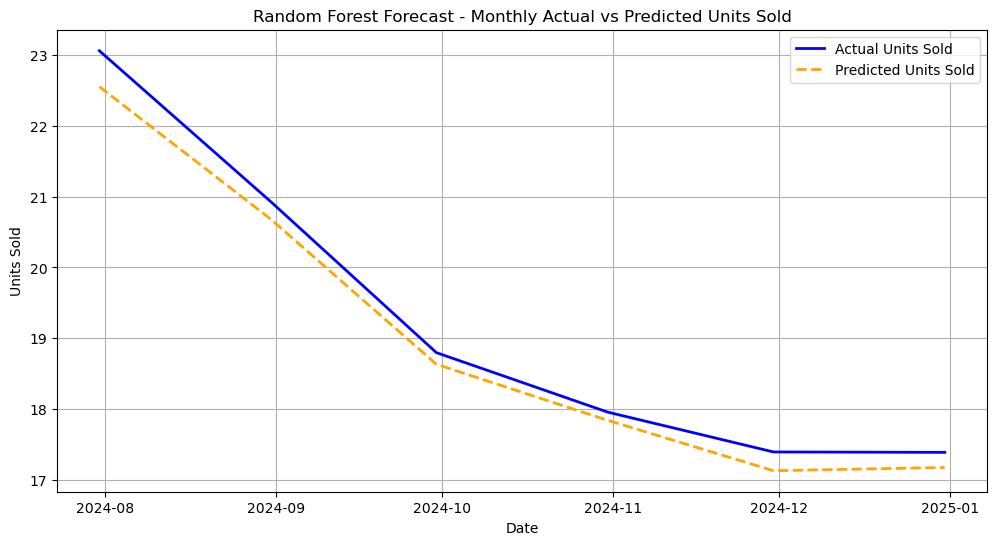

In [119]:
plt.figure(figsize=(12,6))
plt.plot(forecast_monthly.index, forecast_monthly['Actual'], label='Actual Units Sold', color='blue', linewidth=2)
plt.plot(forecast_monthly.index, forecast_monthly['Predicted'], label='Predicted Units Sold', color='orange', linestyle='--', linewidth=2)

plt.title("Random Forest Forecast - Monthly Actual vs Predicted Units Sold")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.show()